## CDS4004 Tutorial 7
### Network Measures

<div class="alert alert-info">
    
Your name: Ng Ngai Fung

Your student ID: 4112150
    
</div>

This tutorial require the configuration below. (networkx with version 3.0 or above and scipy with version 1.8 or above)

In [1]:
# !pip install 'networkx==3.0'
# !pip install 'scipy==1.8'

Before we start, we can execute the cell below to load the libraries/modules that we need to use in this tutorial.

In [2]:
import networkx as nx
import warnings
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')

### Part 1 - Create a ER (random) graph

#### In this tutorial, we will make use of ``fast_gnp_random_graph()`` to generate a random graph/network.

Function header: ``fast_gnp_random_graph(n, p, seed=None, directed=False)``

Parameters:
- n: (int), the number of nodes.
- p: (float), probability for edge creation.
- seed: (integer), Indicator of random number generation state. See Randomness.
- directed: (bool) default is equal to false. Indicate whether this is directed graph (If True)

Note that: The G<sub>n,p</sub> graph algorithm chooses each of the [n(n-1)]/2 (undirected) or n(n-1) (directed) possible edges with probability p. This algorithm runs in O(n+m) time, where m is the expected number of edges, which equals p(n(n-1)/2). This should be faster than gnp_random_graph() when p is small and the expected number of edges is small.

#### The second function that we need to learn is ``spring_layout()``

The layout of the nodes and edges is automatically determined by the Fruchterman-Reingold force-directed algorithm (called “spring layout” in NetworkX), which conducts a pseudo-physics simulation of the movements of the nodes, assuming that each edge is a spring with a fixed equilibrium distance. This heuristic algorithm tends to bring groups of well-connected nodes closer to each other, making the result of visualization more meaningful and aesthetically more pleasing.

Function header: ``spring_layout(G, k=None, pos=None, fixed=None, iterations=50, threshold=0.0001, weight='weight', scale=1, center=None, dim=2, seed=None)``

Parameters:
- G: NetworkX graph or list of nodes
    - A position will be assigned to every node in G. 
    
- k: (float) (default=None)
    - Optimal distance between nodes. If None the distance is set to 1/sqrt(n) where n is the number of nodes. 
    - Increase this value to move nodes farther apart.
    
- pos: (dict) or None optional (default=None)
    - Initial positions for nodes as a dictionary with node as keys and values as a coordinate list or tuple. If None, then use random initial positions.
    
- fixed (list) or None optional (default=None)
    - Nodes to keep fixed at initial position. Nodes not in G.nodes are ignored. ValueError raised if fixed specified and pos not.
    
- iterations (int) optional (default=50)
    - Maximum number of iterations taken

- threshold: (float) optional (default = 1e-4)
    - Threshold for relative error in node position changes. The iteration stops if the error is below this threshold.

- weight (string) or None optional (default=’weight’)
    - The edge attribute that holds the numerical value used for the edge weight. Larger means a stronger attractive force. If None, then all edge weights are 1.

- scale (number) or None (default: 1)
    - Scale factor for positions. Not used unless fixed is None. If scale is None, no rescaling is performed.

- center (array-like) or None
    - Coordinate pair around which to center the layout. Not used unless fixed is None.

- dim (int)
    - Dimension of layout.

- seed (int), RandomState instance or None optional (default=None)
    - Set the random state for deterministic node layouts. If int, seed is the seed used by the random number generator, if numpy.random.RandomState instance, seed is the random number generator, if None, the random number generator is the RandomState instance used by numpy.random.

Returns:
- pos: (dict)
    - A dictionary of positions keyed by node

#### Execute the cell below to create a random graph

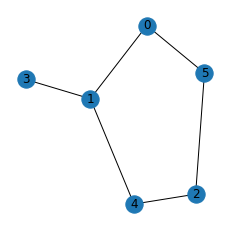

In [3]:
seed = 1
prob = 0.4
num_nodes = 6
gd = nx.fast_gnp_random_graph(num_nodes, prob, seed=seed, directed=False)
pos_d = nx.spring_layout(gd, seed=seed)
plt.figure(figsize=(3,3))
nx.draw(gd, with_labels=True, pos=pos_d,)

#### Task 1.1 Execute the cell above to create the random graph again. Will the graph change? 
- Run the previous code again. Will the graph change?
- Remove ``seed`` from the function ``fast_gnp_random_graph`` and run the code cell for several times. What happened and please explain the reasons.
- Remove the ``pos_d`` from the function ``draw``. What happened and please explain the reasons.

<font color='red'>Edit this cell to explain your answer. </font>


#### Task 1.2 Copy the code from above and modify the value of num_nodes and rerun the code.

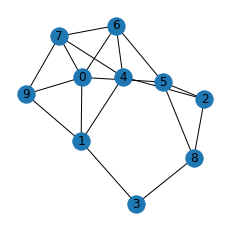

In [12]:
# place your code here
seed = 1
prob = 0.4
num_nodes = 10
gd = nx.fast_gnp_random_graph(num_nodes, prob, seed=seed, directed=False)
pos_d = nx.spring_layout(gd, seed=seed)
plt.figure(figsize=(3,3))
nx.draw(gd, with_labels=True, pos=pos_d,)

#### Task 1.3 Copy the code from above and modify the value of prob and rerun the code.

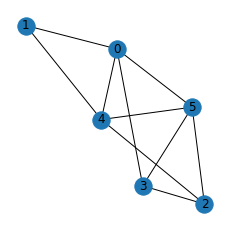

In [14]:
# place your code here
seed = 1
prob = 0.6
num_nodes = 6
gd = nx.fast_gnp_random_graph(num_nodes, prob, seed=seed, directed=False)
pos_d = nx.spring_layout(gd, seed=seed)
plt.figure(figsize=(3,3))
nx.draw(gd, with_labels=True, pos=pos_d,)

#### Task 1.4 Given the following adjacent matrix, construct the graph gc and plot it
Please refer to the documentation for the functions in networkx:    
https://networkx.org/documentation/stable/reference/

matrix(  
[[0, 1, 0, 0, 0, 1],  
        [1, 0, 0, 1, 1, 0],  
        [0, 0, 0, 0, 1, 1],  
        [0, 1, 0, 0, 0, 0],  
        [0, 1, 1, 0, 0, 0],  
        [1, 0, 1, 0, 0, 0]])

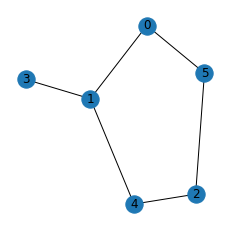

In [17]:
# place your code here
matrix =[[0, 1, 0, 0, 0, 1],
        [1, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 1, 1],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0, 0]]
G = nx.from_numpy_array(np.array(matrix))
pos = nx.spring_layout(G, seed=seed)
plt.figure(figsize=(3,3))
nx.draw(G, with_labels=True, pos=pos,)


### Part 2 - Network Measure

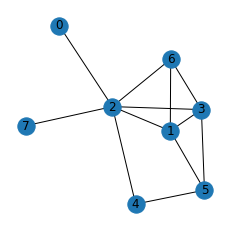

In [18]:
seed = 10
prob = 0.5
num_nodes = 8
g = nx.fast_gnp_random_graph(num_nodes, prob, seed=seed, directed=False)
pos_ = nx.spring_layout(g, seed=1)
plt.figure(figsize=(3,3))
nx.draw(g, with_labels=True, pos=pos_,)

#### Run the cell above to draw the graph


#### Task 2.1 Calculate the density of the graph using ``density()``

In [20]:
# place your code here
density = nx.density(g)
print(density)

density = nx.density(G)
print(density)

0.42857142857142855
0.4


#### Task 2.2 Get the degrees of a graph using ``degree()``

In [21]:
# place your code here
degree = nx.degree(g)
print(degree)
degree = nx.degree(G)
print(degree)

[(0, 1), (1, 4), (2, 6), (3, 4), (4, 2), (5, 3), (6, 3), (7, 1)]
[(0, 2), (1, 3), (2, 2), (3, 1), (4, 2), (5, 2)]


#### Task 2.3 Write a function to calculate the average degree k of a graph

In [22]:
# place your code here
def avg_degree(g):
    return np.mean([d for n, d in g.degree()])
avg_degree(g)

3.0

#### Task 2.4 Write a function to calculate the density of a graph

In [ ]:
# place your code here
def get_density(g):
    return nx.density(g)

#### Task 2.5 Mannually calculate the diameter of the graph and verify your answer with ``nx.diameter()``
**You need to explain your answer.**

<font color='red'>
    the diameter of g: 3 (the maximum short path is 0245, 7213, 7263 ...)
    <br>
    the diameter of G: 3 (the maximum short path is 3142)
</font>


In [23]:
diameter = nx.diameter(g)
print(diameter)
diameter = nx.diameter(G)
print(diameter)

3
3


#### Task 2.6 Generate random graph with 1000 nodes. Repeat the process several times and try to find out the relationship between density and the probability?

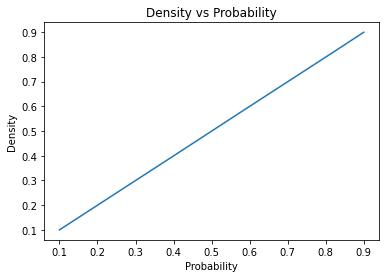

In [24]:
# place your code here
seed = 1
num_nodes = 1000
prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
density = []
for i in prob:
    g = nx.fast_gnp_random_graph(num_nodes, i, seed=seed, directed=False)
    density.append(nx.density(g))
plt.plot(prob, density)
plt.xlabel('Probability')
plt.ylabel('Density')
plt.title('Density vs Probability')
plt.show()

<font color='red'>The graph show that there are in positive correlation (seems directly proportional: perfect positive straight-line correlation). For my personal point of view. When the probability is increasing, then the willing of the node linking together will be also increased. So according to the equation of density:
<br>
<br>
$d = \dfrac{m}{(n)(n-1)}$
<br>
where m: the number of edges
<br>
where n: the number of nodes
<br>
<br>
 when the number of edges increased but the number of nodes keep unchange.</font>
